In [2]:
# load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
# load the data
df = pd.read_csv('DOGE-USD-daily 2021.csv', index_col = 0, header = 0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,228961515
2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3421562680
2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2707003608
2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1372398979
2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,687256067
...,...,...,...,...,...,...
2022-07-16,0.063037,0.064725,0.061870,0.064280,0.064280,279644299
2022-07-17,0.064288,0.065394,0.063101,0.063107,0.063107,249697026
2022-07-18,0.063114,0.068674,0.063114,0.067715,0.067715,564795959


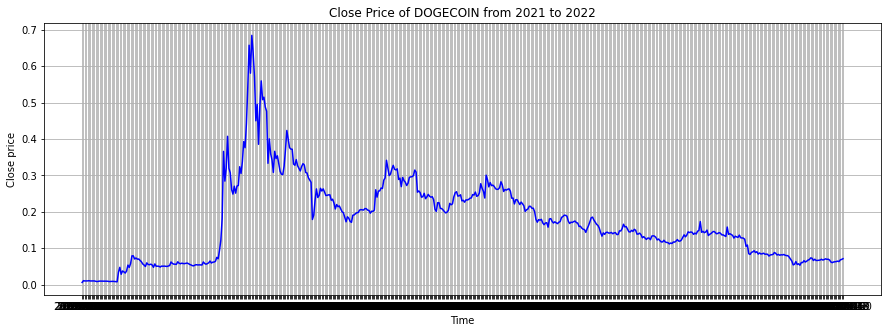

In [4]:
# Close Price of DOGECOIN from 2021 to 2022
close_price = df["Close"]
# plot
plt.figure(figsize=(15,5))
plt.plot(close_price, linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('Close price')
plt.title('Close Price of DOGECOIN from 2021 to 2022')
plt.grid(True)
plt.show()

In [5]:
# make it stationary
ln_close = np.log(close_price)
r = ln_close.diff(1).dropna()   # take the first difference and drop NaN
r

Date
2021-01-02    0.624437
2021-01-03   -0.082849
2021-01-04   -0.000409
2021-01-05    0.015544
2021-01-06    0.053483
                ...   
2022-07-16    0.019447
2022-07-17   -0.018417
2022-07-18    0.070476
2022-07-19    0.018987
2022-07-20    0.027610
Name: Close, Length: 565, dtype: float64

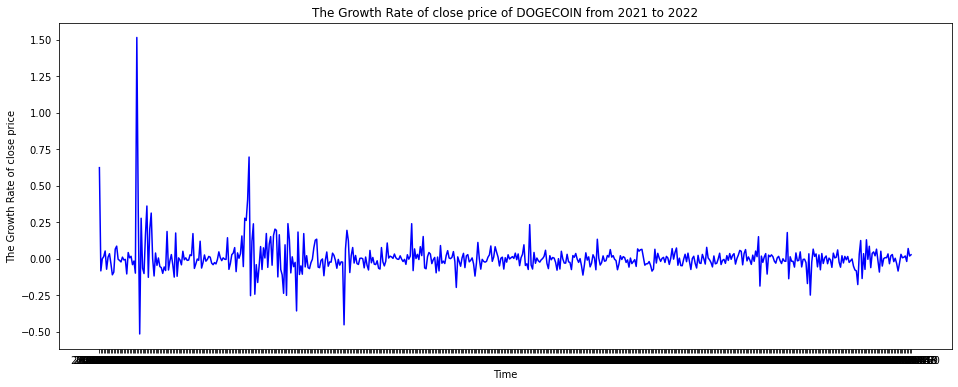

In [6]:
# The Growth Rate of close price of DOGECOIN
plt.figure(figsize=(16,6))
plt.plot(r, linestyle='-', color='blue')
plt.xlabel('Time')
plt.ylabel('The Growth Rate of close price')
plt.title('The Growth Rate of close price of DOGECOIN from 2021 to 2022')
plt.show()

In [7]:
# test stationary - Dickey-Fuller test
dftest = adfuller(r, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -12.626280411287796
2. P-Value :  1.5391432203890918e-23
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 562
5. Critical Values :
	 1% :  -3.442039359113542
	 5% :  -2.8666965134862514
	 10% :  -2.5695162601790758


In [8]:
# test stationary - Dickey-Fuller test
dftest = adfuller(close_price, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.661672304311208
2. P-Value :  0.080908678341925
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 546
5. Critical Values :
	 1% :  -3.442383534871275
	 5% :  -2.8668480382580386
	 10% :  -2.569597004924258


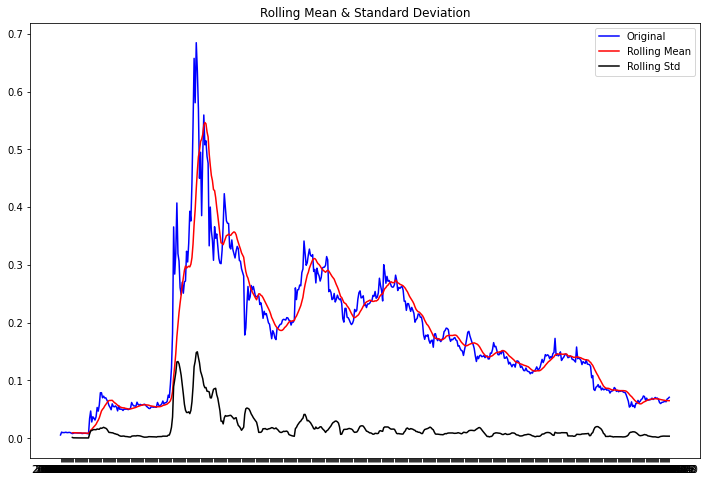

Results of Dickey-Fuller Test:
p-value = 0.0809. The series is likely non-stationary.
Test Statistic                  -2.661672
p-value                          0.080909
#Lags Used                      19.000000
Number of Observations Used    546.000000
Critical Value (1%)             -3.442384
Critical Value (5%)             -2.866848
Critical Value (10%)            -2.569597
dtype: float64


In [9]:
# test stationary - Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

test_stationarity(close_price)

[ 1.00000000e+00 -1.87295274e-02 -7.12945019e-02  1.37196458e-01
  1.63489804e-03 -6.90458191e-02  5.18737185e-02  2.59171809e-02
 -8.30505577e-02  6.28692699e-02  7.30762277e-02 -1.72864913e-02
 -1.39063529e-02  1.92930488e-02 -2.53130258e-02  7.23128759e-02
 -6.10456628e-02 -3.59081963e-03  1.38931646e-02 -1.63441822e-02
  4.53782754e-02  8.11282292e-03  9.09228700e-04 -3.02867634e-02
  1.19553361e-02 -6.66296495e-02  7.79427223e-02  7.76361038e-02]


<function matplotlib.pyplot.show(close=None, block=None)>

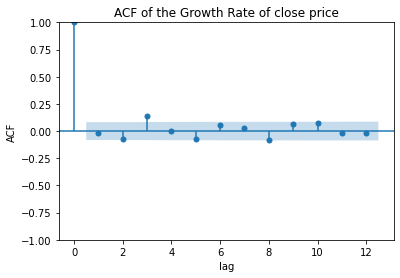

In [10]:
# acf_plot
result_acf = acf(r)
print(result_acf)

plot_acf(r,lags = 12)
plt.xlabel("lag")
plt.ylabel("ACF")
plt.title("ACF of the Growth Rate of close price")
plt.show

[ 1.00000000e+00 -1.87627358e-02 -7.19251292e-02  1.35890910e-01
  6.88086207e-04 -5.16047471e-02  3.34859105e-02  1.93445024e-02
 -6.39995198e-02  5.60992778e-02  5.88528915e-02  1.43599531e-02
 -2.11475379e-02 -7.21662671e-03 -1.70886384e-02  8.78356776e-02
 -8.14669787e-02  1.48747243e-02 -6.66420102e-03 -8.24579837e-03
  5.08297262e-02 -2.58326137e-03  1.09238816e-02 -2.84096475e-02
 -8.08652348e-03 -7.38269708e-02  1.02858602e-01  7.57789231e-02]


/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

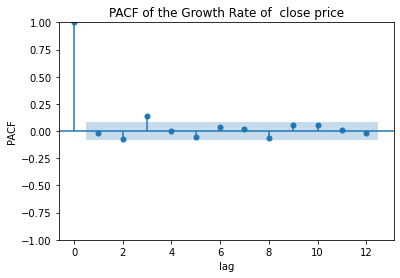

In [11]:
# pacf_plot
result_pacf = pacf(r)
print(result_pacf)

plot_pacf(r, lags=12)
plt.xlabel("lag")
plt.ylabel("PACF")
plt.title("PACF of the Growth Rate of  close price")
plt.show

In [12]:
# split data
m = 30
train_r = r[0:len(r)-m]
test_r = r[len(r)-m:len(r)]
train_r

Date
2021-01-02    0.624437
2021-01-03   -0.082849
2021-01-04   -0.000409
2021-01-05    0.015544
2021-01-06    0.053483
                ...   
2022-06-16   -0.135274
2022-06-17    0.035103
2022-06-18   -0.072445
2022-06-19    0.130405
2022-06-20   -0.003633
Name: Close, Length: 535, dtype: float64

In [13]:
# tune the model
p = 12
q = 12
mse = np.zeros((p,q))
for i in range(p):
    for j in range(q):
        model = ARIMA(train_r, order=(i,0,j))
        model_fit = model.fit()
        forecasted_r = model_fit.forecast(m)
        mse[i,j]=mean_squared_error(test_r,forecasted_r)

/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency i

In [14]:
print(np.amin(mse))
print(np.where(mse == np.amin(mse)))

0.0016624042178973563
(array([5]), array([4]))


In [15]:
# Best model is ARIMA(5,0,4)
n = len(r)-m
model = ARIMA(train_r, order=(5,0,4))
model_fit = model.fit()
model_fit.summary()

/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/phyllis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/state

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  535
Model:                 ARIMA(5, 0, 4)   Log Likelihood                 414.312
Date:                Sat, 30 Mar 2024   AIC                           -806.625
Time:                        12:24:37   BIC                           -759.520
Sample:                    01-02-2021   HQIC                          -788.195
                         - 06-20-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.007      0.613      0.540      -0.010       0.019
ar.L1          0.1056    101.918      0.001      0.999    -199.650     199.861
ar.L2         -0.0202     46.733     -0.000      1.000     -91.616      91.575
ar.L3          0.7010     27.738      0.025      0.980     -53.664      55.066
ar.L4         -0.2792     56.525     -0.005      0.996    -111.065     110.507
ar.L5         -0.0225      4.090     -0.006      0.996      -8.039       7.994
ma.L1         -0.1024    101.918     -0.001      0.999    -199.858     199.653
ma.L2         -0.0452     47.066     -0.001      0.999     -92.293      92.203
ma.L3         -0.6473     21.265     -0.030      0.976     -42.327      41.032
ma.L4          0.3089     54.708      0.006      0.995    -106.917     107.535
sigma2         0.0124      0.000     54.957      0.000       0.012       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             99218.61
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             5.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        68.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# fit model
forecasted_r = model_fit.forecast(30)
mse_pre = mean_squared_error(test_r,forecasted_r)
# Revert to predicted close price
x0 = ln_close[-31]
forecasted_ln_close = np.zeros(m)
forecasted_ln_close[0] = forecasted_r[0]+x0
for i in range(m-1):
    forecasted_ln_close[i+1] = forecasted_r[i+1]+forecasted_ln_close[i]
forecasted_close = np.exp(forecasted_ln_close)
# Combine data
test_data = close_price[len(r)-m+1:len(r)+1]
test_data = pd.DataFrame(test_data)
forecasted_close=pd.DataFrame(forecasted_close)
test_data.insert(1, column="forecasted_close", value=forecasted_close)
test_data

,Close,forecasted_close
Date,,
2022-06-21,0.065571,0.060755
2022-06-22,0.061711,0.060366
2022-06-23,0.064032,0.061173
2022-06-24,0.067124,0.061536
2022-06-25,0.068503,0.061264
2022-06-26,0.073177,0.062040
2022-06-27,0.072239,0.062307
2022-06-28,0.065957,0.062147
2022-06-29,0.069468,0.062889


<Axes: xlabel='Date'>

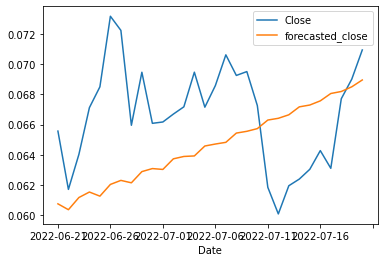

In [17]:
# plot the best model result
test_data[["Close", "forecasted_close"]].plot()

In [18]:
# calculate MAPE, mse
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape_arima = mape(test_data.Close, forecasted_close)
mse = mean_squared_error(test_data.Close, forecasted_close)

print(mape_arima)
print(mse)

5.58276895888816
2.3900398347171704e-05
